In [1]:
import pandas as pd

In [5]:
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
generos = filmes.generos.str.get_dummies()
dados_filmes = pd.concat([filmes, generos], axis=1)
dados_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [15]:
from sklearn.cluster import KMeans

In [19]:
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)
print(f'grupos {modelo.labels_}')

grupos [2 2 1 ... 1 2 1]


In [22]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.34251077 -0.27385602 -0.23520361 -0.26176476 -0.56634156
   0.9181018  -0.21327279  0.10704093 -0.1672883   0.29600126  0.43956167
  -0.06947216 -0.17638799  0.67672197 -0.31605869  0.07167326  1.43706469
  -0.12307002 -0.04099265]
 [ 0.03716548 -0.3196691  -0.29640067 -0.22008116 -0.18225925  0.24922629
  -0.27493097  0.13336625  0.1022553  -0.18144489 -0.08959668 -0.10828743
  -0.11252127  0.0228144  -0.21944512  0.1894813  -0.19443013 -0.48661403
   0.06057548  0.02886537]
 [-0.05917995  0.76703209  1.62764503  1.2579177   1.14552923 -0.13422387
  -0.30648411 -0.21095563 -0.58098859  0.99582951 -0.09492563 -0.24149722
   0.56445162  0.18069797 -0.15771598 -0.27949664  0.67826876 -0.2512601
  

In [24]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)

In [32]:
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.342511,-0.273856,-0.235204,-0.261765,-0.566342,0.918102,-0.213273,0.107041,-0.167288,0.296001,0.439562,-0.069472,-0.176388,0.676722,-0.316059,0.071673,1.437065,-0.123070,-0.040993
1,0.037165,-0.319669,-0.296401,-0.220081,-0.182259,0.249226,-0.274931,0.133366,0.102255,-0.181445,-0.089597,-0.108287,-0.112521,0.022814,-0.219445,0.189481,-0.194430,-0.486614,0.060575,0.028865
2,-0.059180,0.767032,1.627645,1.257918,1.145529,-0.134224,-0.306484,-0.210956,-0.580989,0.995830,-0.094926,-0.241497,0.564452,0.180698,-0.157716,-0.279497,0.678269,-0.251260,-0.055218,-0.053666


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DDD2B4688>,
      dtype=object)

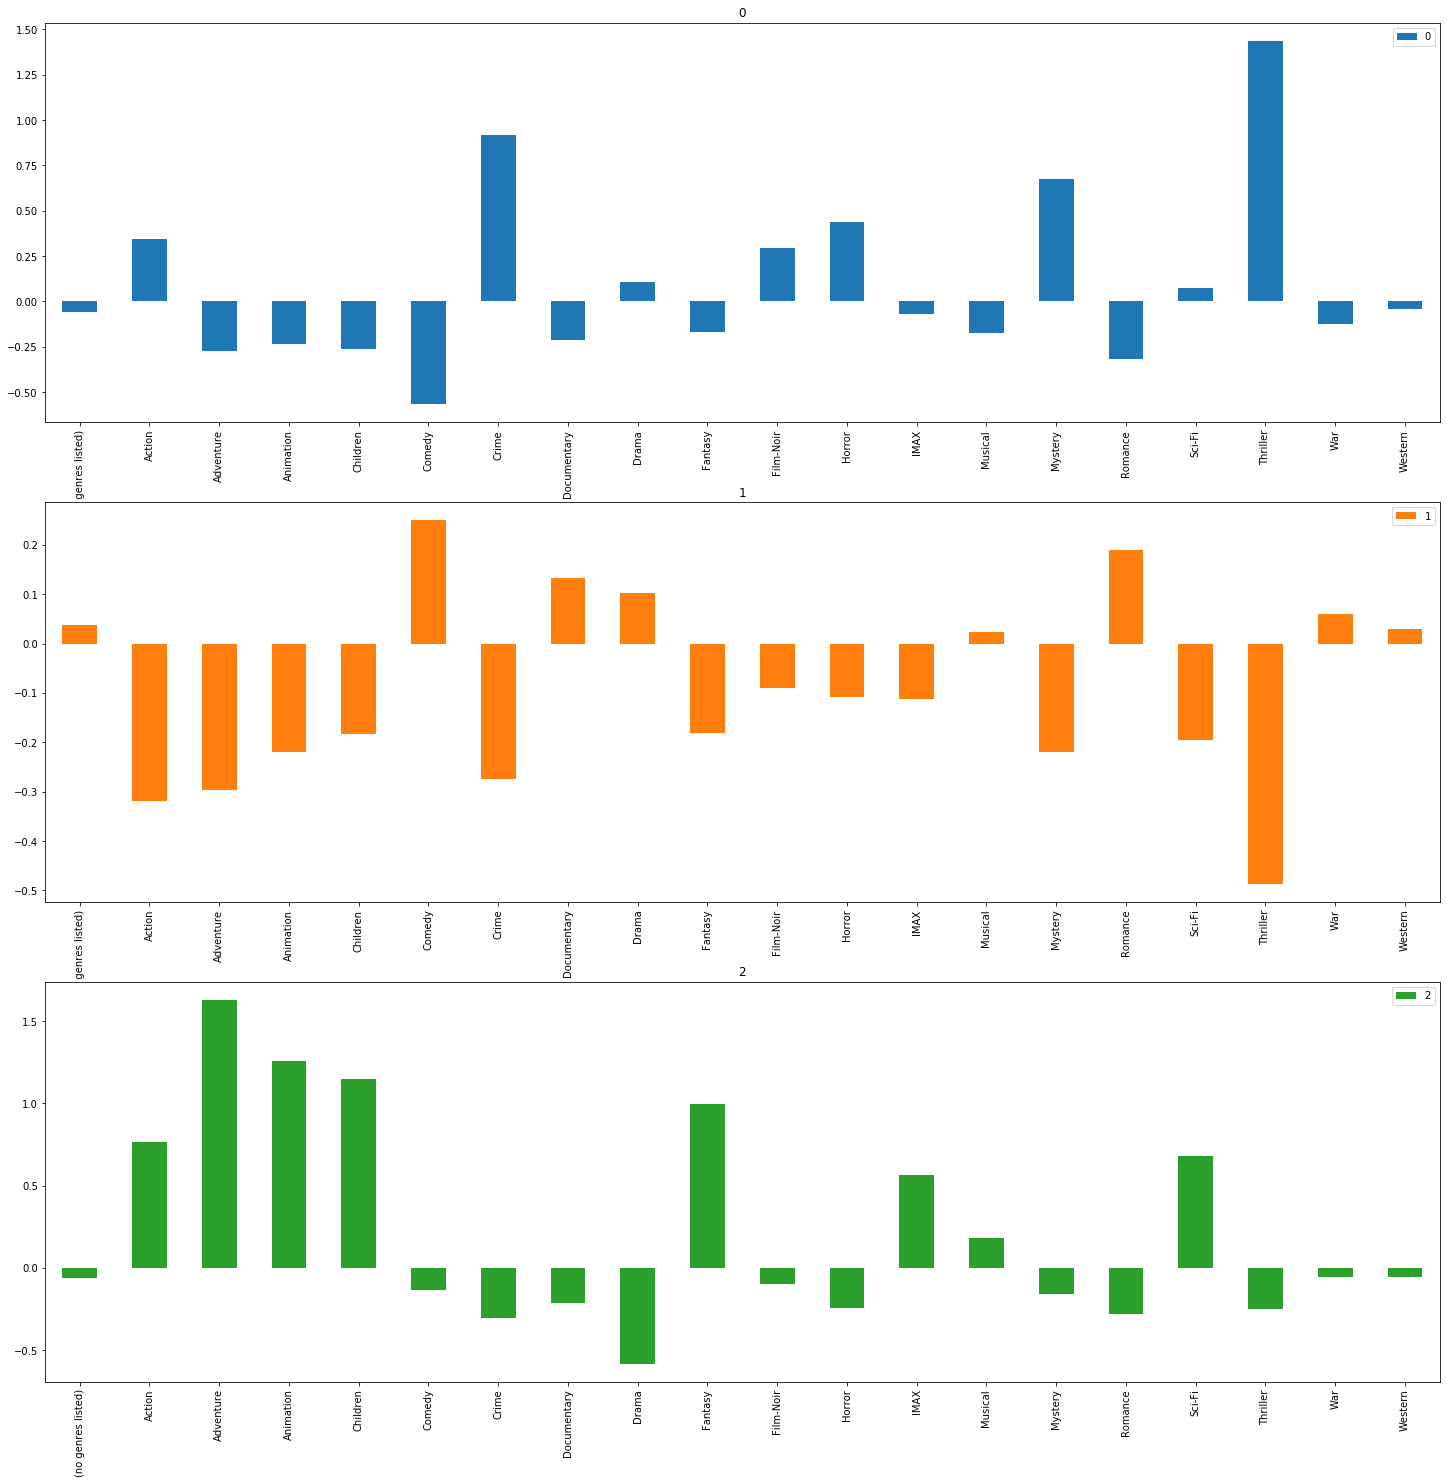

In [33]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False)

In [35]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8719,126142,The Cave of the Golden Rose (1991),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8927,136016,The Good Dinosaur (2015),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2254,2991,Live and Let Die (1973),Action|Adventure|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1584,2123,All Dogs Go to Heaven (1989),Animation|Children|Comedy|Drama|Fantasy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8924,135887,Minions (2015),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1877,2495,"Fantastic Planet, The (Planète sauvage, La) (1...",Animation|Sci-Fi,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6529,54259,Stardust (2007),Adventure|Comedy|Fantasy|Romance,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9561,173355,Travels of an Ant (1983),Animation,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,44,Mortal Kombat (1995),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-31.600643 ,  25.831507 ],
       [ 21.816364 ,  52.373524 ],
       [ 40.194542 ,  -0.2609784],
       ...,
       [ -3.7914197,  -7.879954 ],
       [-56.99279  ,  28.7322   ],
       [  1.7567202,  27.655788 ]], dtype=float32)

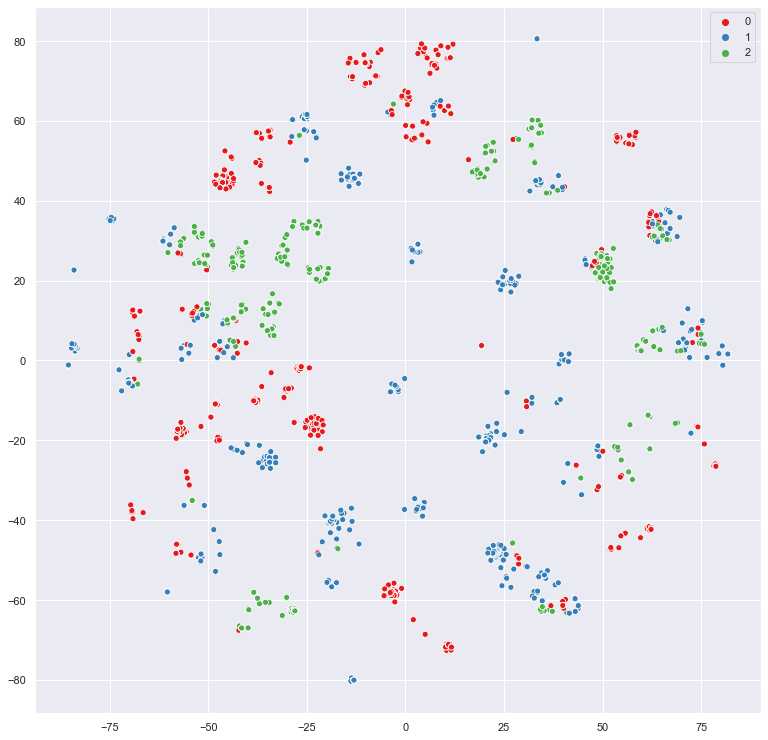

In [41]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=modelo.labels_, palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DE492B648>,
      dtype=object)

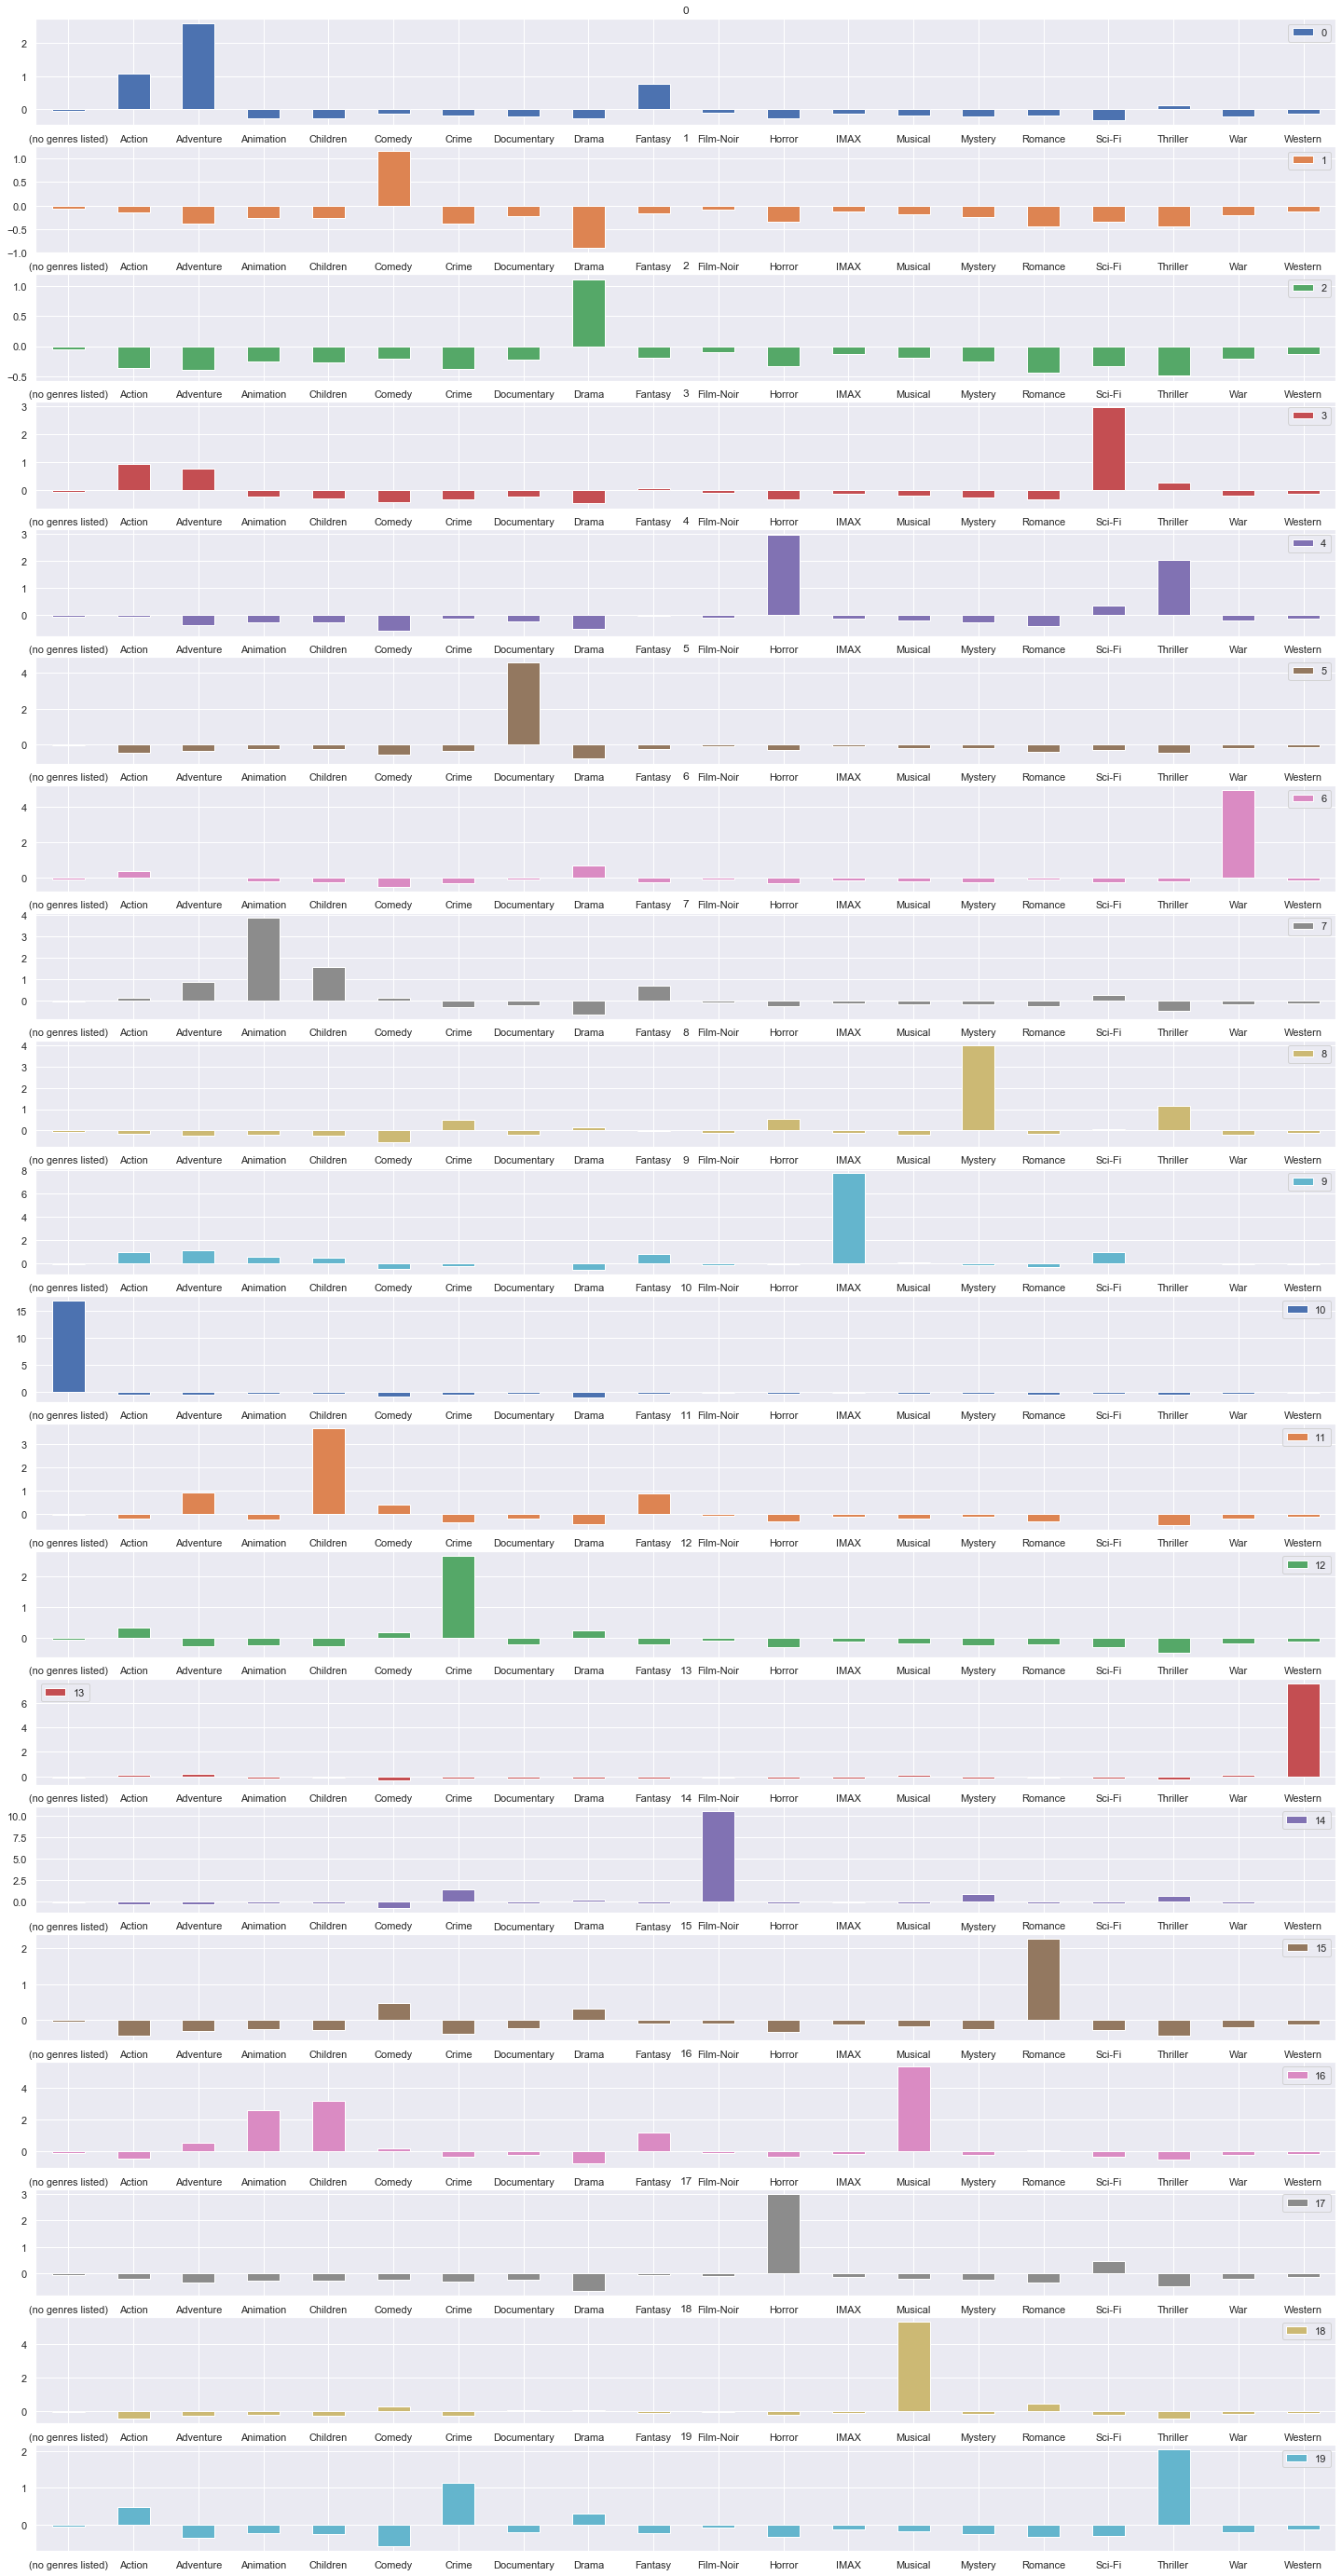

In [48]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [49]:
grupo = 16
filtro = modelo.labels_ == grupo
dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6626,56152,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...,0,0,1,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3727,5159,Ferngully: The Last Rainforest (1992),Animation|Children|Comedy|Musical,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
7907,95170,Beauty and the Beast: The Enchanted Christmas ...,Animation|Children|Fantasy|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1548,2084,Newsies (1992),Children|Musical,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
981,1282,Fantasia (1940),Animation|Children|Fantasy|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2144,2857,Yellow Submarine (1968),Adventure|Animation|Comedy|Fantasy|Musical,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
95,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1555,2092,"Return of Jafar, The (1994)",Adventure|Animation|Children|Fantasy|Musical|R...,0,0,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3186,4294,"5,000 Fingers of Dr. T, The (1953)",Children|Fantasy|Musical,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
789,1032,Alice in Wonderland (1951),Adventure|Animation|Children|Fantasy|Musical,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
def kmeans(numero_clusters, generos):
    modelo=KMeans(n_clusters= numero_clusters)
    modelo.fit(generos)
    return [numero_clusters, modelo.inertia_]

In [51]:
kmeans(20, generos_escalados)

[20, 54375.9413189997]

In [52]:
kmeans(3, generos_escalados)

[3, 166364.90840241432]

In [53]:
resultado = [ kmeans(numero_grupos, generos_escalados) for numero_grupos in range(1, 41) ]
resultado

[[1, 194840.0],
 [2, 179449.8157320783],
 [3, 166231.33902102924],
 [4, 158408.18409963953],
 [5, 146668.8076515823],
 [6, 137820.87190077],
 [7, 128872.2171573385],
 [8, 121353.29553961604],
 [9, 110732.43181766884],
 [10, 104459.15601187698],
 [11, 96143.13408130646],
 [12, 88747.43951137664],
 [13, 81226.5068936136],
 [14, 75841.13056541502],
 [15, 68423.3727659258],
 [16, 64417.34228729707],
 [17, 60109.38734922481],
 [18, 57812.3374072512],
 [19, 57098.91226226008],
 [20, 54991.31463385465],
 [21, 54587.5467009099],
 [22, 52168.93632112708],
 [23, 50231.90619275275],
 [24, 49136.63029401015],
 [25, 48040.48131138884],
 [26, 46803.23170869071],
 [27, 45598.70463164722],
 [28, 45132.04854932636],
 [29, 43737.521591407116],
 [30, 43724.14873343866],
 [31, 41865.277899848545],
 [32, 40925.124871280015],
 [33, 40990.24418202678],
 [34, 38853.706487402735],
 [35, 38327.69860273487],
 [36, 37418.05666701954],
 [37, 37196.33169251406],
 [38, 36883.35601301721],
 [39, 35922.50874171395],
 

In [55]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179449.815732
2,3,166231.339021
3,4,158408.184100
4,5,146668.807652
5,6,137820.871901
6,7,128872.217157
7,8,121353.295540
8,9,110732.431818
9,10,104459.156012


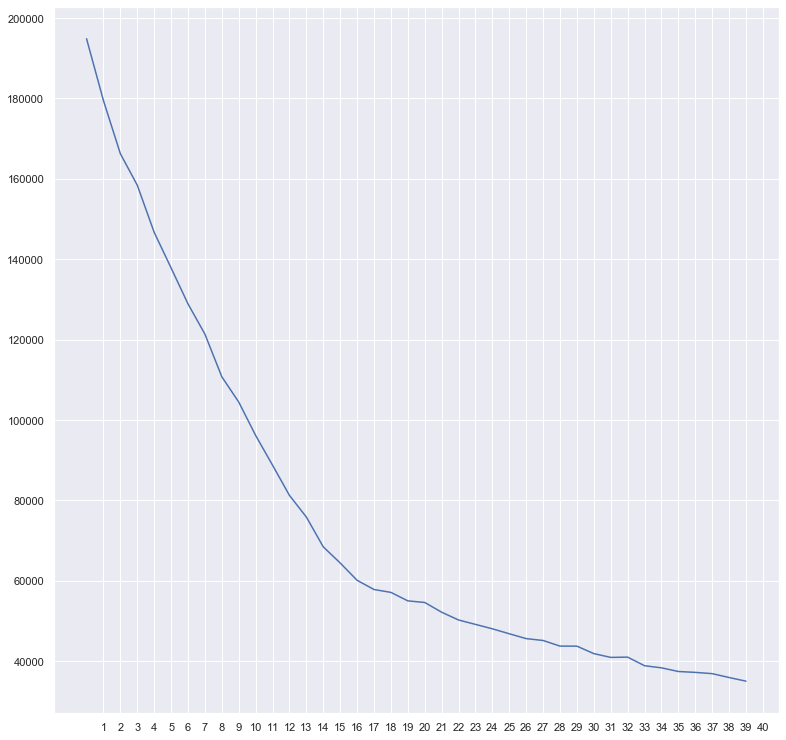

In [57]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DE3DF3C88>,
      dtype=object)

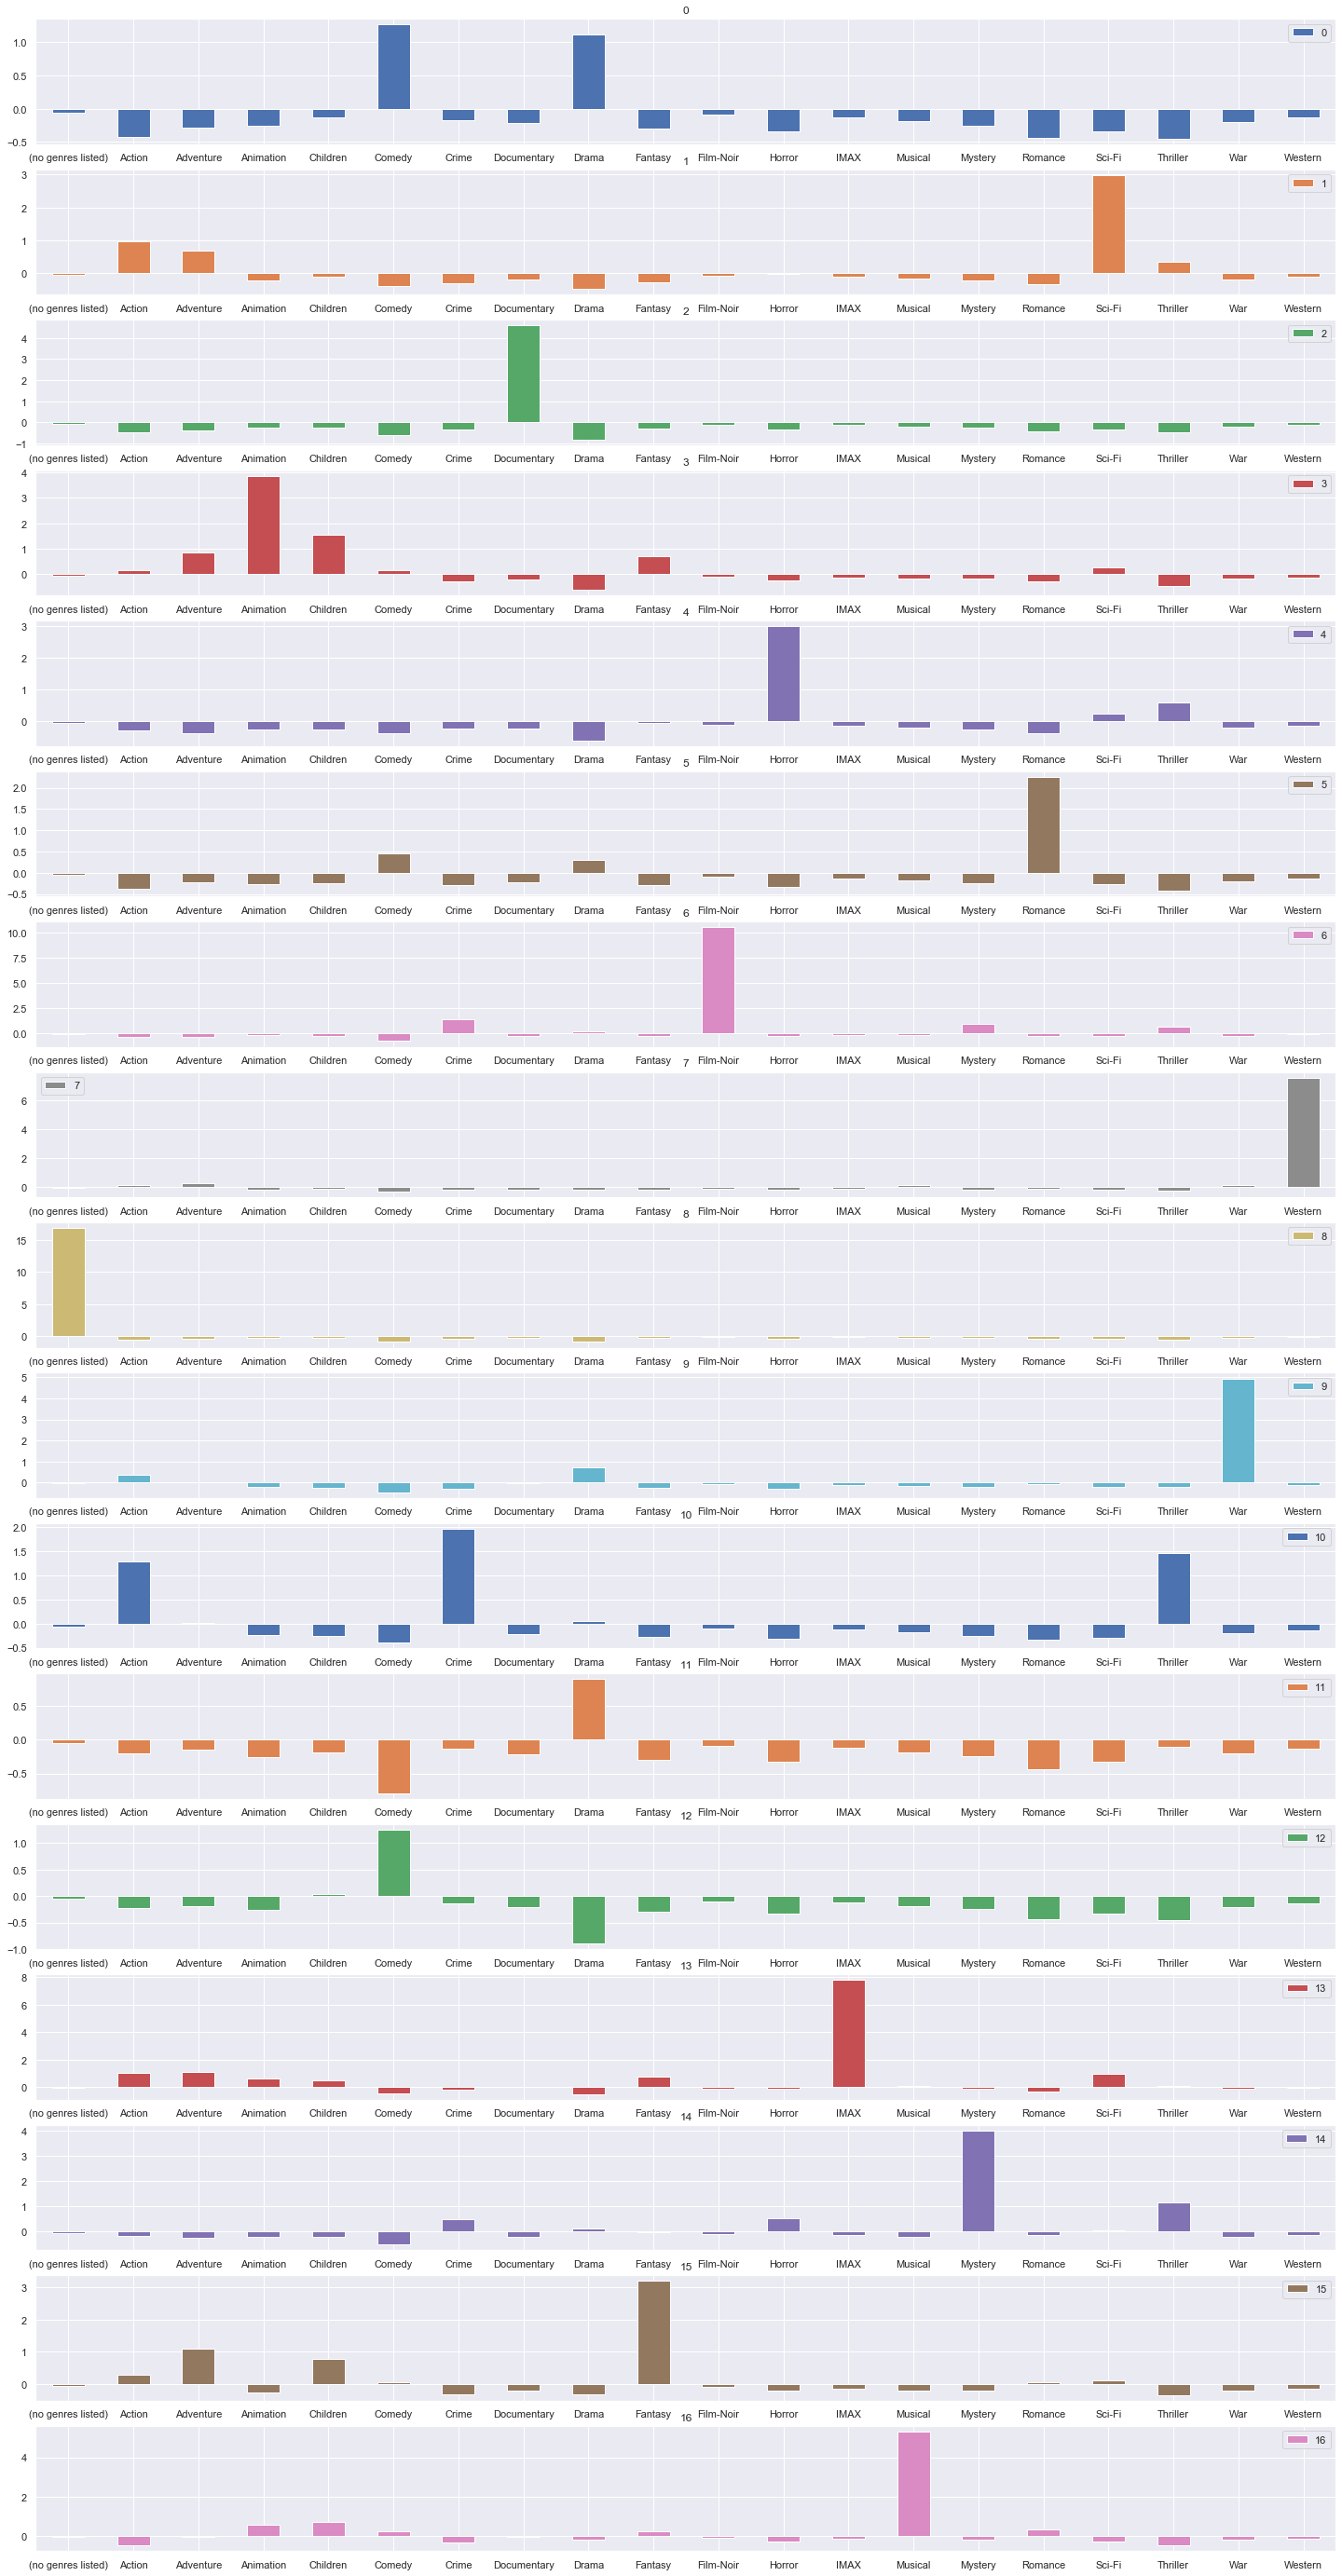

In [58]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [59]:
grupo = 15
filtro = modelo.labels_ == grupo
dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3574,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,7045,"Witches, The (1990)",Children|Fantasy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6955,65651,Fire and Ice (2008),Adventure|Fantasy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6021,38294,Beowulf & Grendel (2005),Action|Adventure|Drama|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8881,134170,Kung Fury (2015),Action|Comedy|Fantasy|Sci-Fi,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9167,148675,North Pole: Open For Christmas (2015),Children|Fantasy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7749,91104,"Twilight Saga: Breaking Dawn - Part 1, The (2011)",Adventure|Drama|Fantasy|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5680,27706,Lemony Snicket's A Series of Unfortunate Event...,Adventure|Children|Comedy|Fantasy,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8617,118696,The Hobbit: The Battle of the Five Armies (2014),Adventure|Fantasy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,1199,Brazil (1985),Fantasy|Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

In [62]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  9.874233 , -65.24034  ],
       [ 36.99586  ,  38.351837 ],
       [-35.93653  ,  -8.46463  ],
       ...,
       [ 14.959197 , -18.114641 ],
       [  7.2773623, -46.395878 ],
       [-16.527641 ,   7.3770943]], dtype=float32)

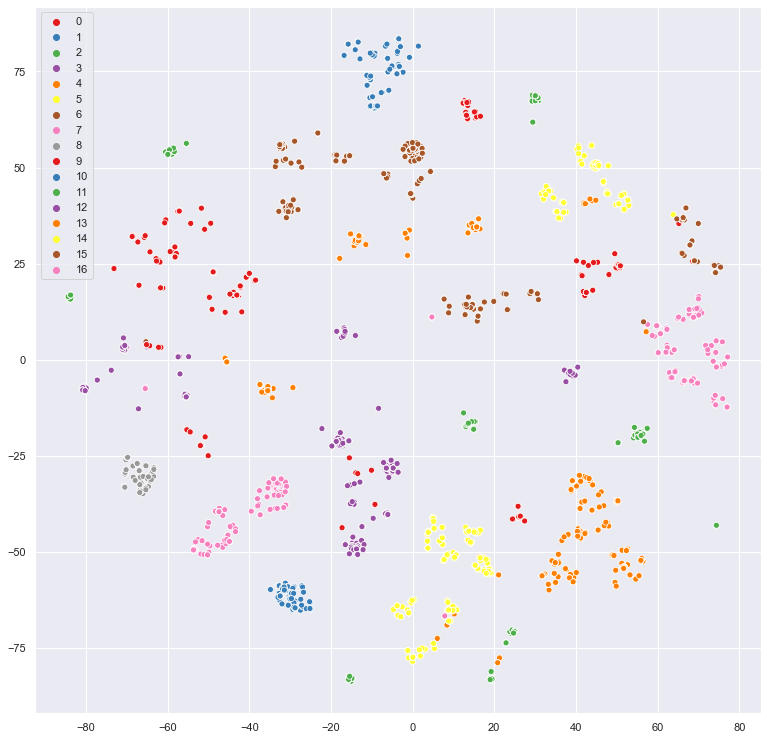

In [67]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=grupos, palette=sns.color_palette('Set1', 17))

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D8037CC88>,
      dtype=object)

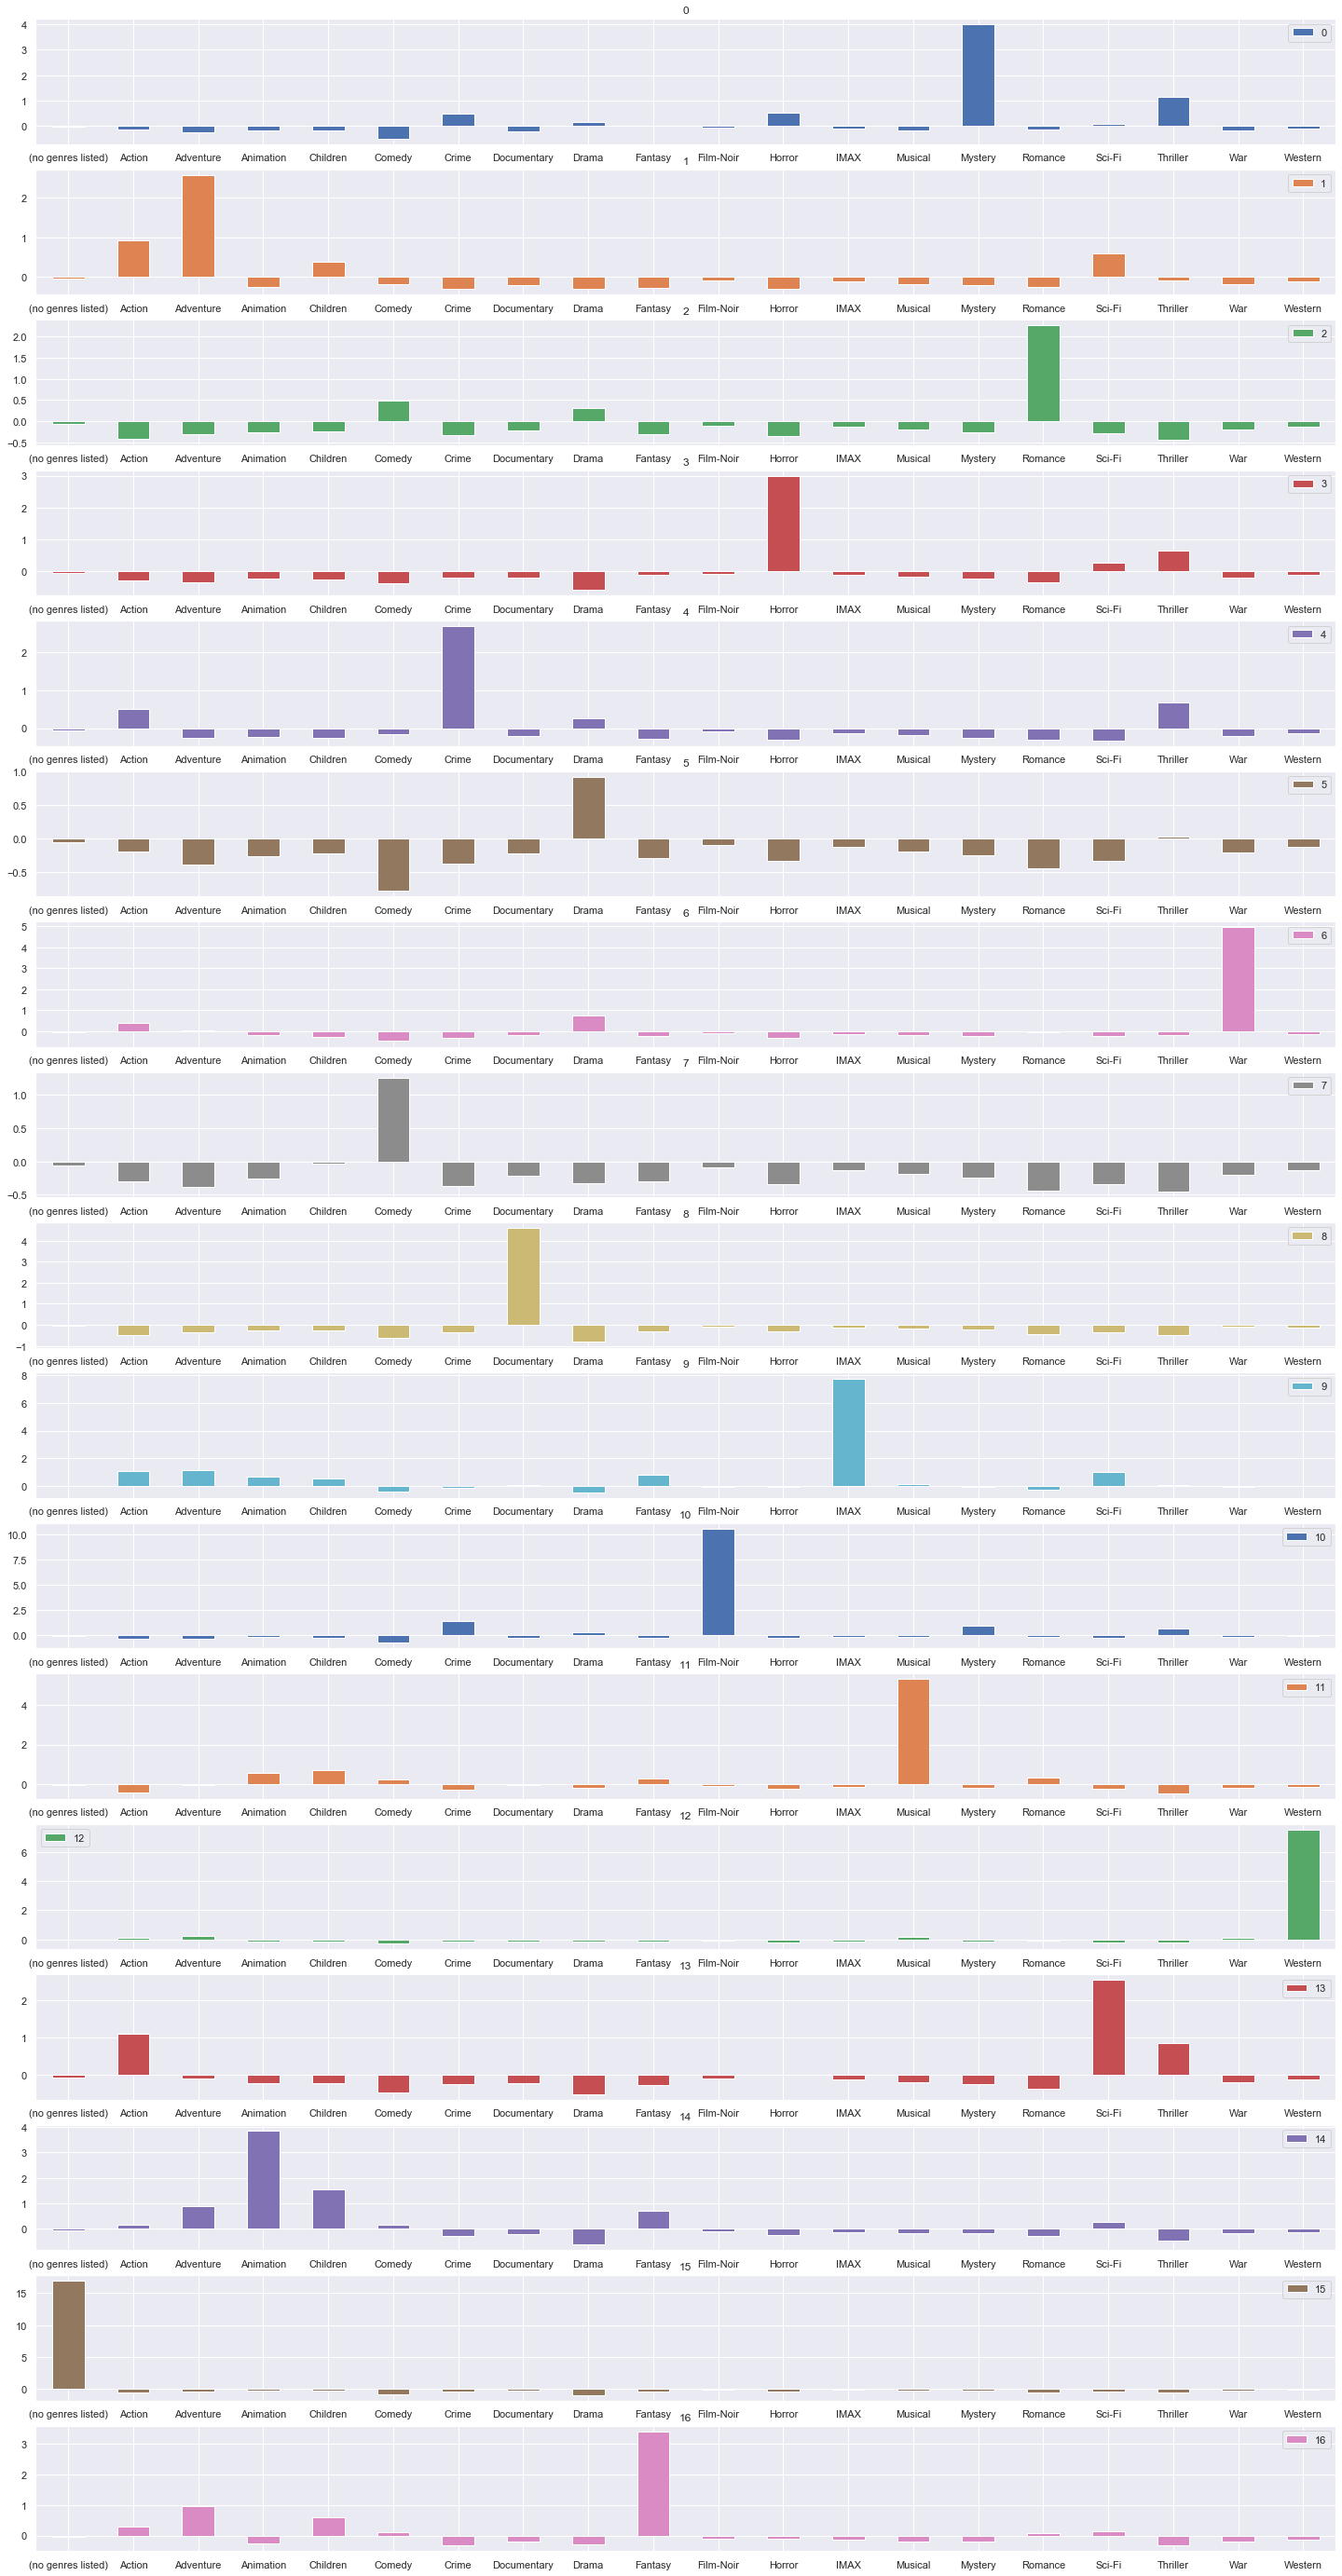

In [70]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [71]:
matriz_distancia= linkage(grupos)
matriz_distancia

array([[ 5.        ,  7.        ,  2.44010464,  2.        ],
       [ 2.        , 17.        ,  2.89360179,  3.        ],
       [ 4.        , 18.        ,  3.32420958,  4.        ],
       [ 1.        , 13.        ,  3.53057695,  2.        ],
       [19.        , 20.        ,  3.60259429,  6.        ],
       [ 3.        , 21.        ,  3.78342798,  7.        ],
       [16.        , 22.        ,  4.13903258,  8.        ],
       [ 0.        , 23.        ,  4.67043218,  9.        ],
       [14.        , 24.        ,  4.83519725, 10.        ],
       [ 8.        , 25.        ,  5.15199506, 11.        ],
       [ 6.        , 26.        ,  5.23724074, 12.        ],
       [11.        , 27.        ,  5.79612477, 13.        ],
       [12.        , 28.        ,  7.86230474, 14.        ],
       [ 9.        , 29.        ,  8.20617229, 15.        ],
       [10.        , 30.        , 10.81386488, 16.        ],
       [15.        , 31.        , 17.0642542 , 17.        ]])

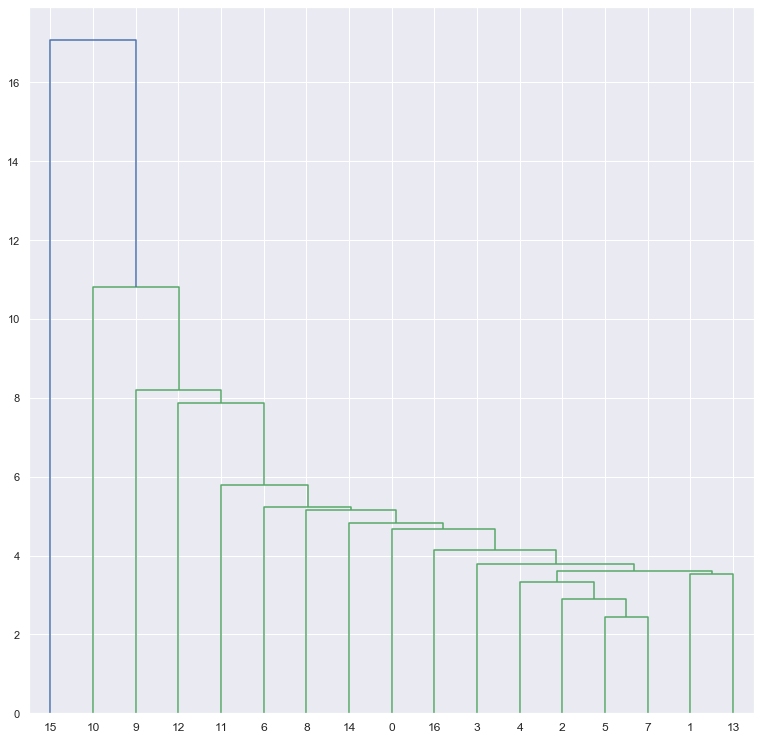

In [73]:
dendograma = dendrogram(matriz_distancia)